<center><h1> Exploratory Data Analysis of cars dataset (Part 2)</h1></center>

***

<center><h2> Univariate descriptive statistics </h2></center>

In [6]:
import set_jupyter_path
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('float_format', '{:.3f}'.format)
from src.car_price_prediction.utils import dataset_manager
sns.set(rc={'figure.figsize':(23,10)})


In [7]:
car_data = dataset_manager.get_cleaned_outliers_dataset()

Let's again look at the statistics of cleaned, here everythin looks fine, next I will make some plots, on different columns on dataset. There is not a lot of columns, so I will check each one of them.

In [8]:
car_data.describe()

,Year,Power,Capacity,Mileage,Price
count,84488.000,66633.000,80541.000,53369.000,85910.000
mean,2006.380,203.504,2.728,126325.933,15925.503
std,6.857,86.769,1.110,80156.397,18654.624
min,1961.000,50.000,0.700,1.000,505.000
25%,2002.000,146.000,2.000,69700.000,4300.000
50%,2006.000,181.000,2.400,120361.000,9376.500
75%,2012.000,249.000,3.200,174000.000,20506.750
max,2018.000,600.000,6.400,800000.000,249000.000


Let's see what columns does it make sense to plot.

In [9]:
car_data.head()

,Url,Expiration,Year,Publication,Transmission,Brand,Model,Power,Capacity,Drive,Mileage,Wheel,Carcass,Fuel,Photo_Urls,Color,Price
0,https://cars.kg/offers/700020.html,Expired,1995.000,13.03.2017,NaN,mercedes-benz,NaN,300.000,3.200,задний,nan,NaN,седан,бензин,['https://i.cars.kg/preview/r/YvS--H_4B-BMdpVk...,темно-синий,3500
1,https://cars.kg/offers/700023.html,Expired,2006.000,13.03.2017,NaN,lexus,rx,268.000,3.300,постоянный полный,129000.000,NaN,внедорожник / пикап,бензин,['https://i.cars.kg/preview/r/WOpX4xBLlrC2oZNY...,серебряный,13100
2,https://cars.kg/offers/700033.html,Expired,2003.000,13.03.2017,NaN,toyota,ist,109.000,1.500,передний,122000.000,NaN,хэтчбек,бензин,['https://i.cars.kg/preview/r/3dFkV2XRYnV04GPZ...,серебряный,4500
3,https://cars.kg/offers/700038.html,Expired,2005.000,13.03.2017,NaN,mercedes-benz,viano,116.000,2.100,задний,251000.000,NaN,минивэн / бус,дизель,['https://i.cars.kg/preview/r/GfuJvEs6Wn9xNnQD...,бежевый,8700
4,https://cars.kg/offers/700039.html,Expired,1997.000,13.03.2017,NaN,audi,NaN,165.000,2.400,передний,nan,NaN,седан,бензин,['https://i.cars.kg/preview/r/B8qi5oqug16kMbJE...,серебряный,3200


Below we can see distribution plot of years of the car, we can see that there are some outliers, more precisely, some very old cars in the dataset, which is why the distribution is skewed to the left

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


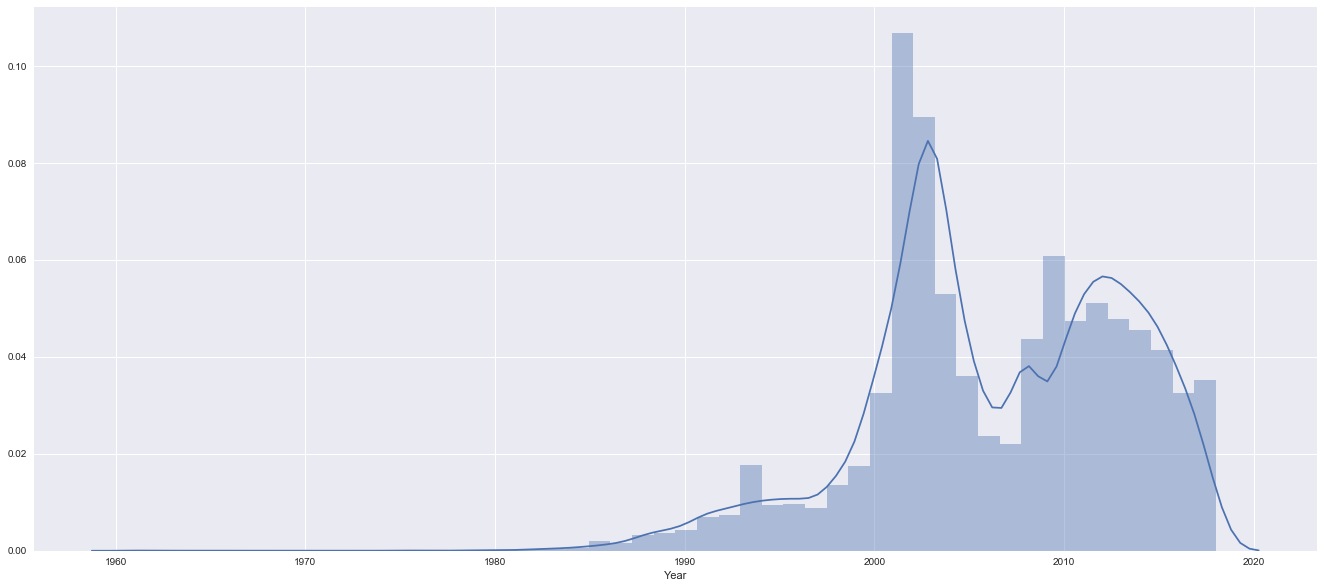

In [10]:
sns.distplot(car_data.Year.dropna())

Here we can see that the power of the cars a little bit skewed to the right, but more or less looks normal

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


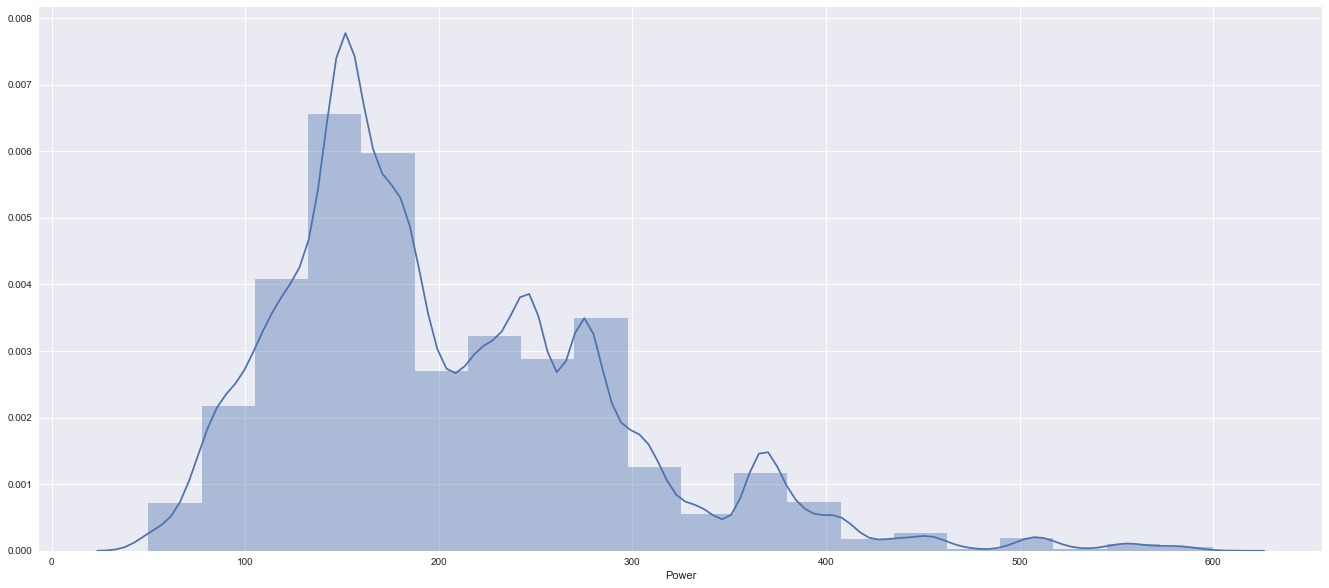

In [11]:
sns.distplot(car_data.Power.dropna(), bins=20)

In the plot below, we can see that the capacity column is more of a discrete variable, not a continous one. And the distribution looks fairly like the distribution of power of the cars, which is logically justified, because there are highly correlated.

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


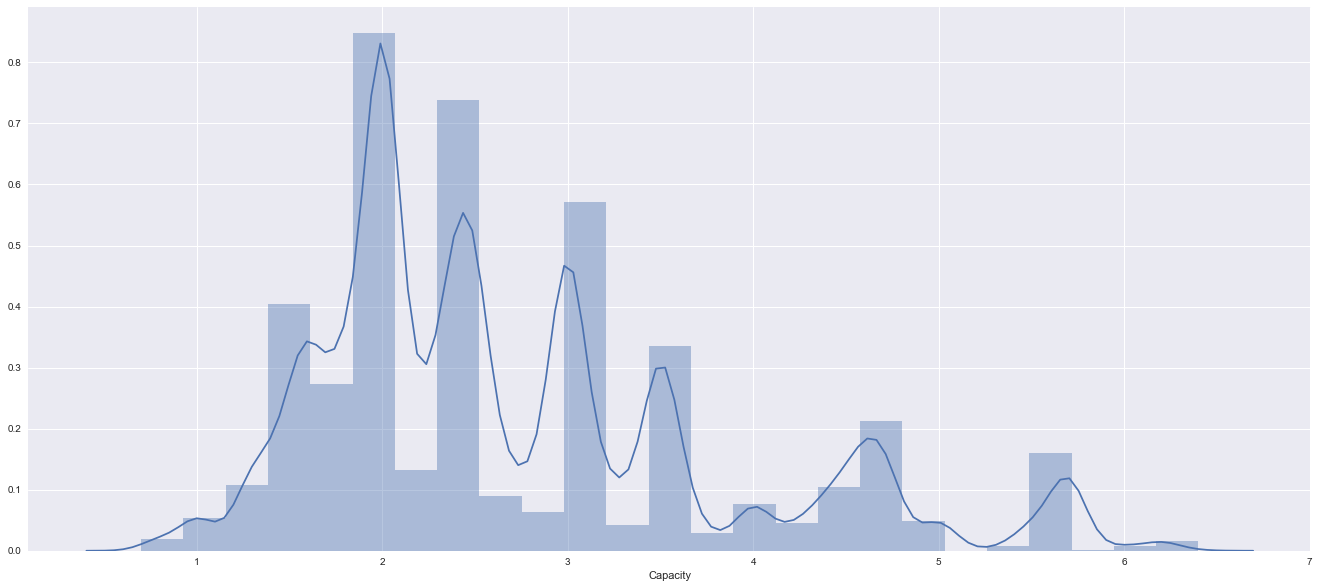

In [12]:
sns.distplot(car_data.Capacity.dropna(), bins=25)

This distribution of mileage below, shows skewed to the right distribution. It may mean that some of the cars with this large mileage are usually trucks or cars used for transits of goods or people.

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


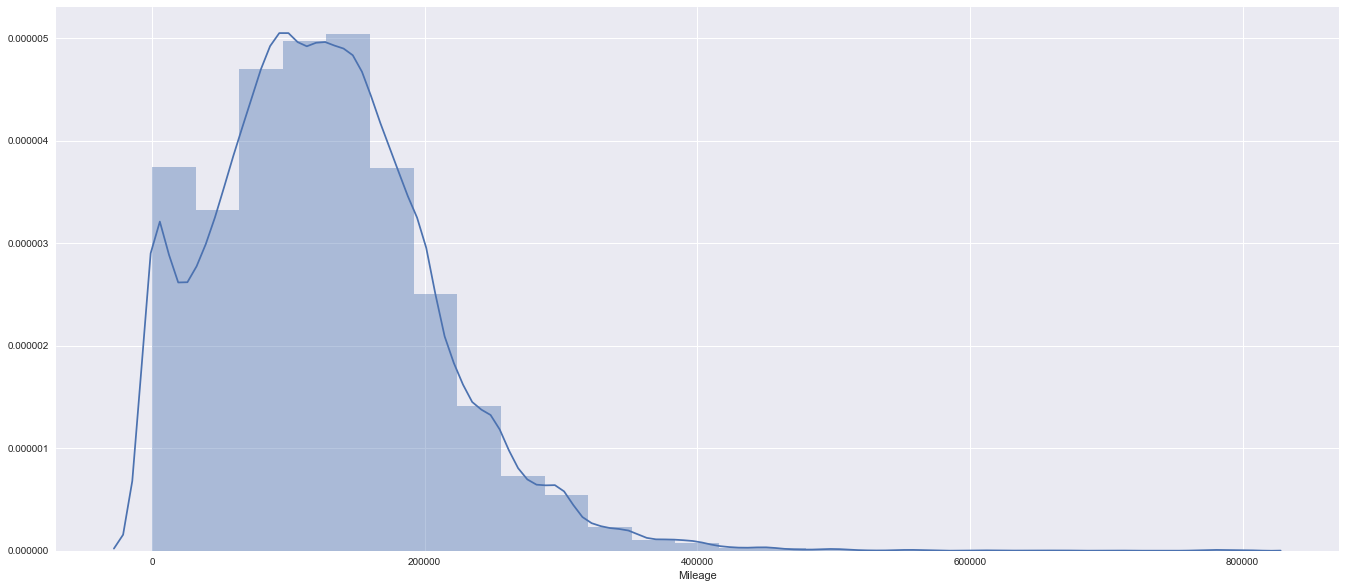

In [13]:
sns.distplot(car_data.Mileage.dropna(), bins=25)

Now let's look at the distribution of the target variable - prices of the cars. It's highly skewed to the right, which makes sense, most of the people use cars as a method of transportation, not as a method of showing their wealthines with highly overpriced cars.

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


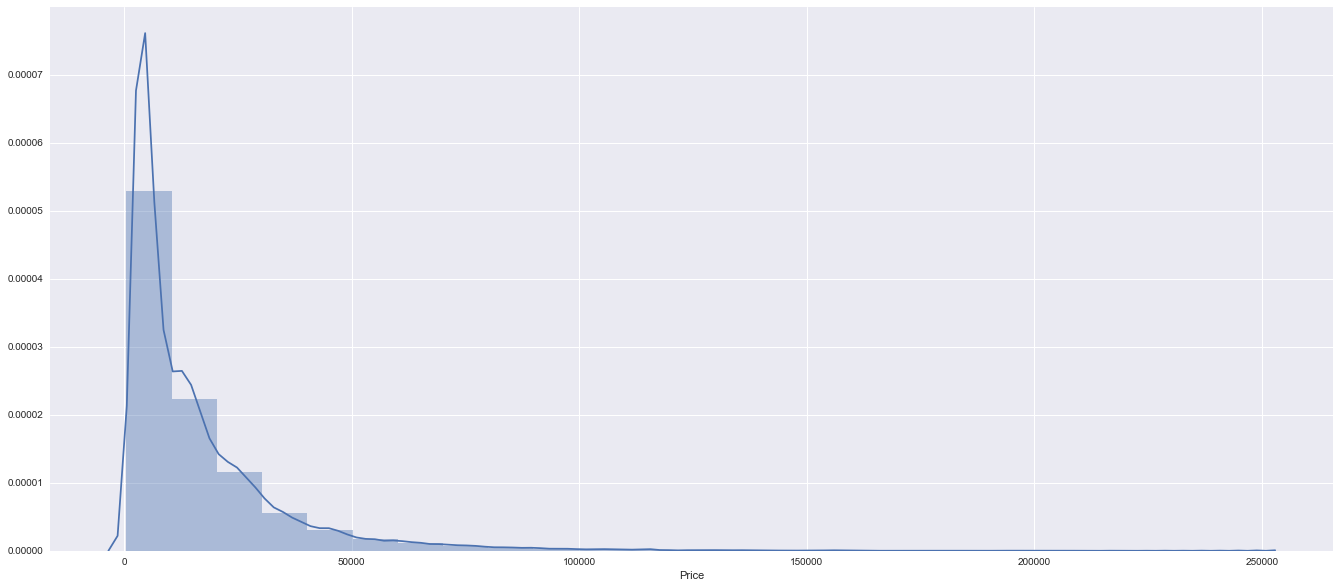

In [14]:
sns.distplot(car_data.Price.dropna(), bins=25)

Now it is a time to look at categorical features.

In [15]:
car_data.head()

,Url,Expiration,Year,Publication,Transmission,Brand,Model,Power,Capacity,Drive,Mileage,Wheel,Carcass,Fuel,Photo_Urls,Color,Price
0,https://cars.kg/offers/700020.html,Expired,1995.000,13.03.2017,NaN,mercedes-benz,NaN,300.000,3.200,задний,nan,NaN,седан,бензин,['https://i.cars.kg/preview/r/YvS--H_4B-BMdpVk...,темно-синий,3500
1,https://cars.kg/offers/700023.html,Expired,2006.000,13.03.2017,NaN,lexus,rx,268.000,3.300,постоянный полный,129000.000,NaN,внедорожник / пикап,бензин,['https://i.cars.kg/preview/r/WOpX4xBLlrC2oZNY...,серебряный,13100
2,https://cars.kg/offers/700033.html,Expired,2003.000,13.03.2017,NaN,toyota,ist,109.000,1.500,передний,122000.000,NaN,хэтчбек,бензин,['https://i.cars.kg/preview/r/3dFkV2XRYnV04GPZ...,серебряный,4500
3,https://cars.kg/offers/700038.html,Expired,2005.000,13.03.2017,NaN,mercedes-benz,viano,116.000,2.100,задний,251000.000,NaN,минивэн / бус,дизель,['https://i.cars.kg/preview/r/GfuJvEs6Wn9xNnQD...,бежевый,8700
4,https://cars.kg/offers/700039.html,Expired,1997.000,13.03.2017,NaN,audi,NaN,165.000,2.400,передний,nan,NaN,седан,бензин,['https://i.cars.kg/preview/r/B8qi5oqug16kMbJE...,серебряный,3200


That's how the countplot of car models look, and it illustrates the reality very well

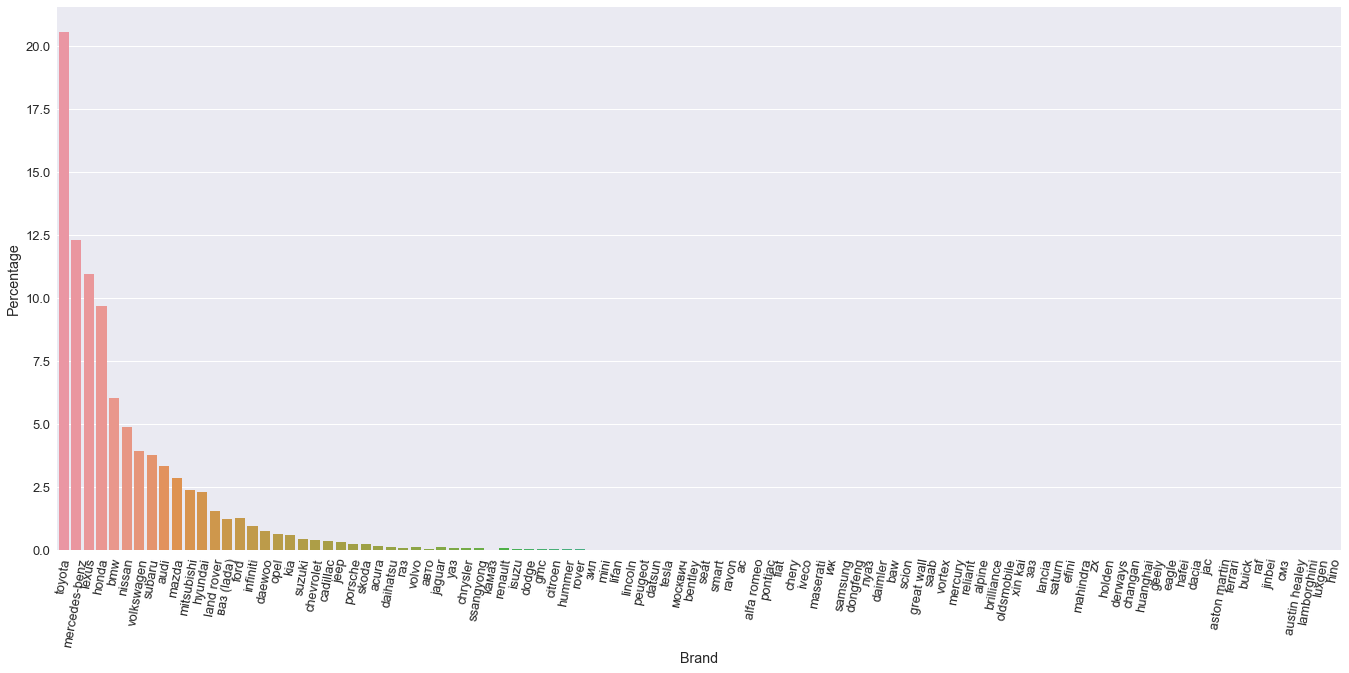

In [16]:
sns.set(font_scale=1.3)
carcass_plot = sns.barplot(car_data.Brand, y = car_data.Capacity, order=car_data.Brand.value_counts().index,
                          estimator=lambda x: len(x) / len(car_data) * 100)
carcass_plot.set_ylabel('Percentage')
plt.xticks(rotation=80)
plt.show()

Text(0,0.5,'Percentage')

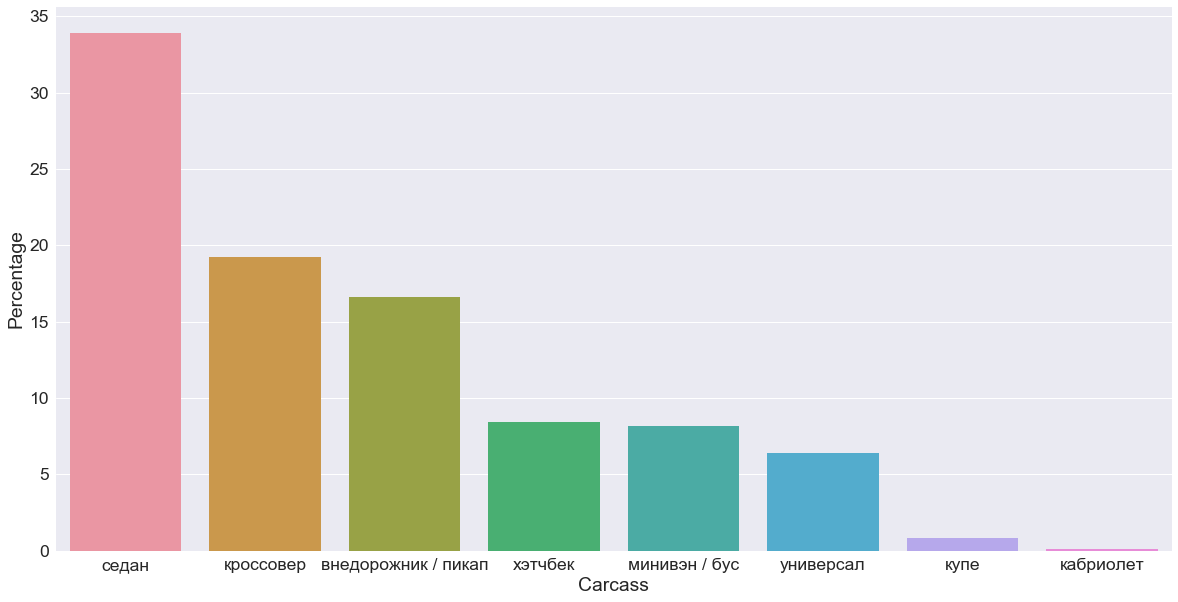

In [161]:
sns.set(font_scale=1.75)
carcass_plot = sns.barplot(car_data.Carcass, y = car_data.Capacity, order=car_data.Carcass.value_counts().index,
                          estimator=lambda x: len(x) / len(car_data) * 100)
carcass_plot.set_ylabel('Percentage')

And let's look which of the color are most prevalent 

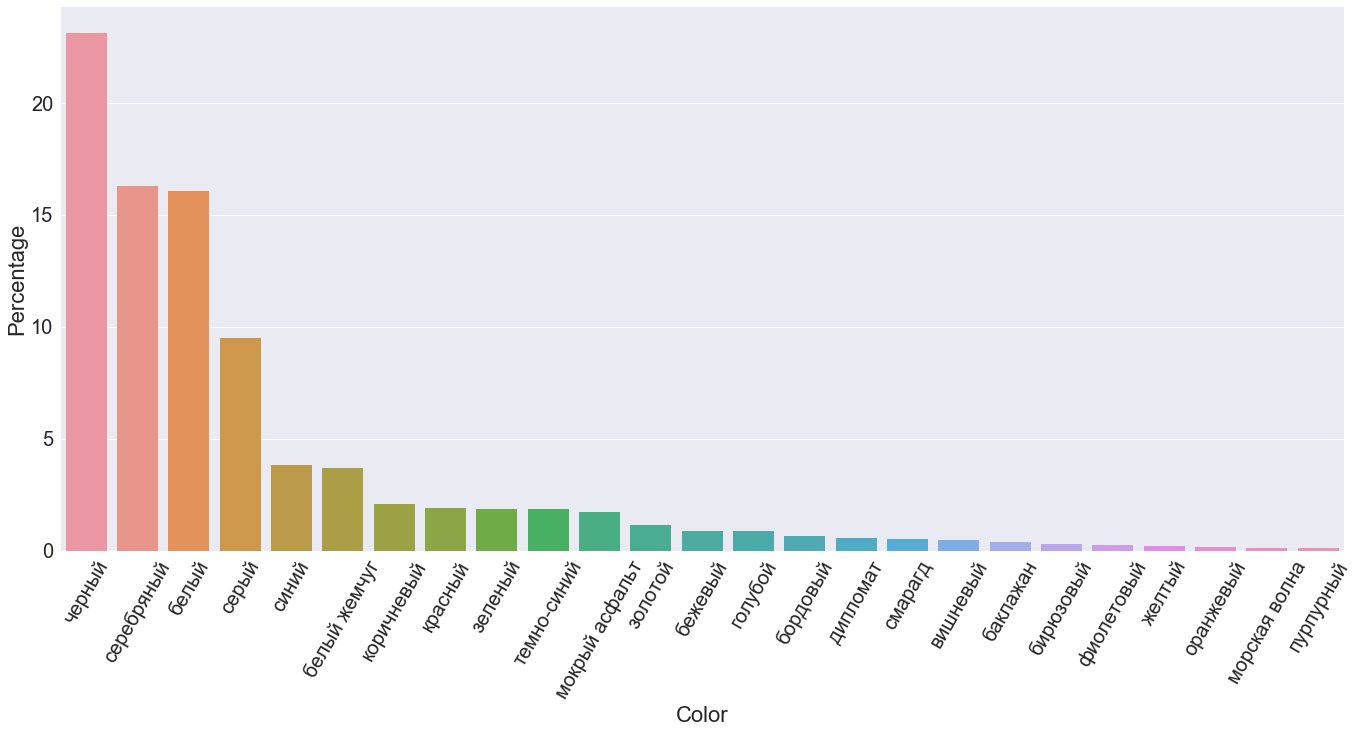

In [187]:
sns.set(font_scale=2)
carcass_plot = sns.barplot(car_data.Color, y = car_data.Capacity, order=car_data.Color.value_counts().index,
                          estimator=lambda x: len(x) / len(car_data) * 100)
carcass_plot.set_ylabel('Percentage')
plt.xticks(rotation=60)
plt.show()


And also we can look at the barplot of drives

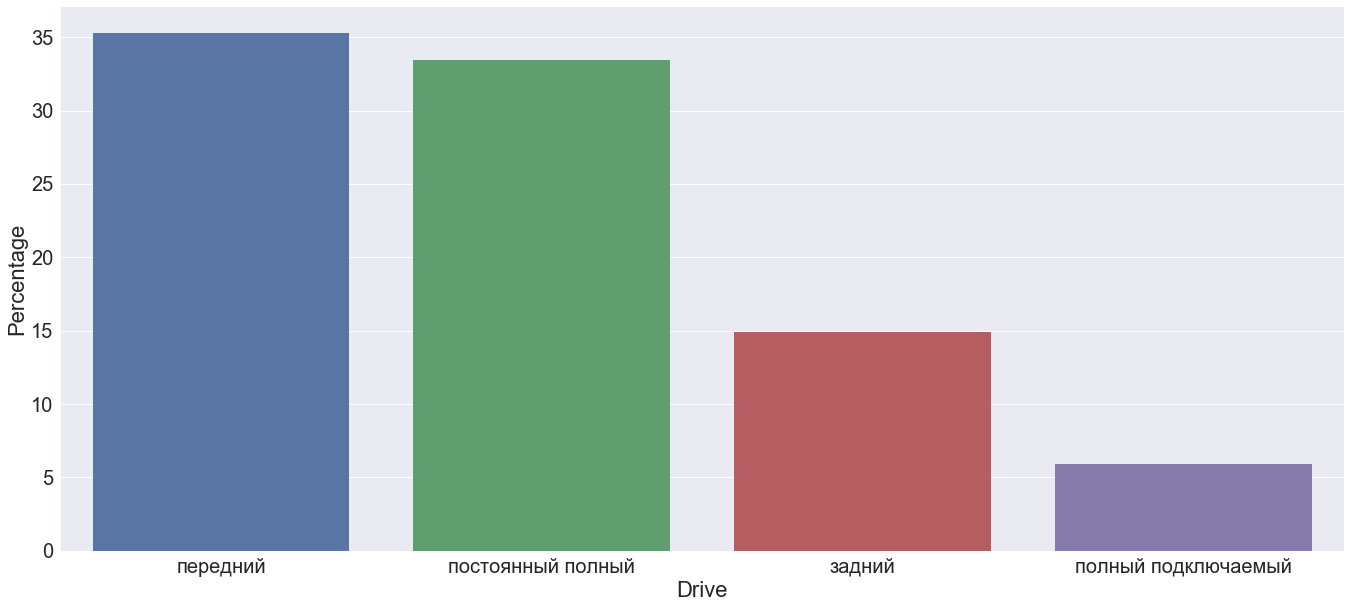

In [189]:
sns.set(font_scale=2)
carcass_plot = sns.barplot(car_data.Drive, y = car_data.Capacity, order=car_data.Drive.value_counts().index,
                          estimator=lambda x: len(x) / len(car_data) * 100)
carcass_plot.set_ylabel('Percentage')
plt.show()

Here we check what kind of fuels cars in Kyrgyzstan use

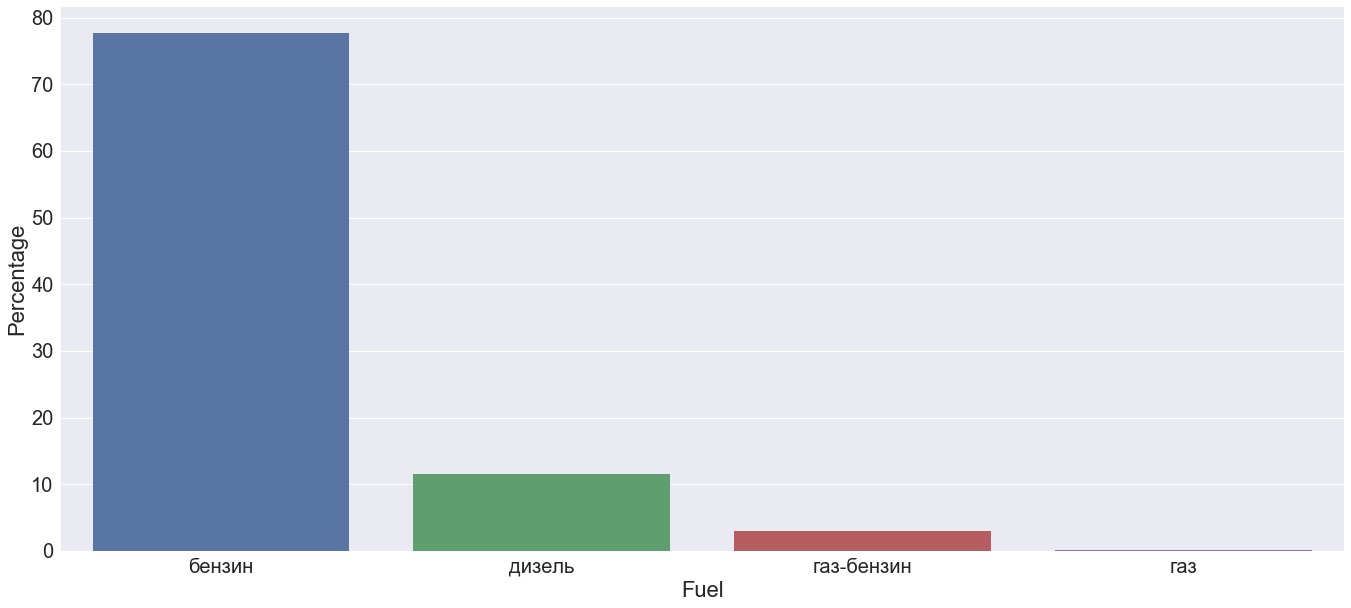

In [190]:
sns.set(font_scale=2)
carcass_plot = sns.barplot(car_data.Fuel, y = car_data.Capacity, order=car_data.Fuel.value_counts().index,
                          estimator=lambda x: len(x) / len(car_data) * 100)
carcass_plot.set_ylabel('Percentage')
plt.show()

There is also a publication date, we can engineer it and get the month in which the car was published and look at the plot of publishing months. From the plot we can see that most of the cars are being published at September.

In [209]:
car_data.Publication = pd.to_datetime(car_data.Publication)
car_data.Publication = car_data.Publication.apply(lambda x: str(x.year) + " " + x.strftime('%b'))

We can see that september and october of a 2018 was the hottest season of selling the cars, according to the news, there were some modification to the custom-house laws at summer of 2018 and people could sell more cars with less prices in September and October. 

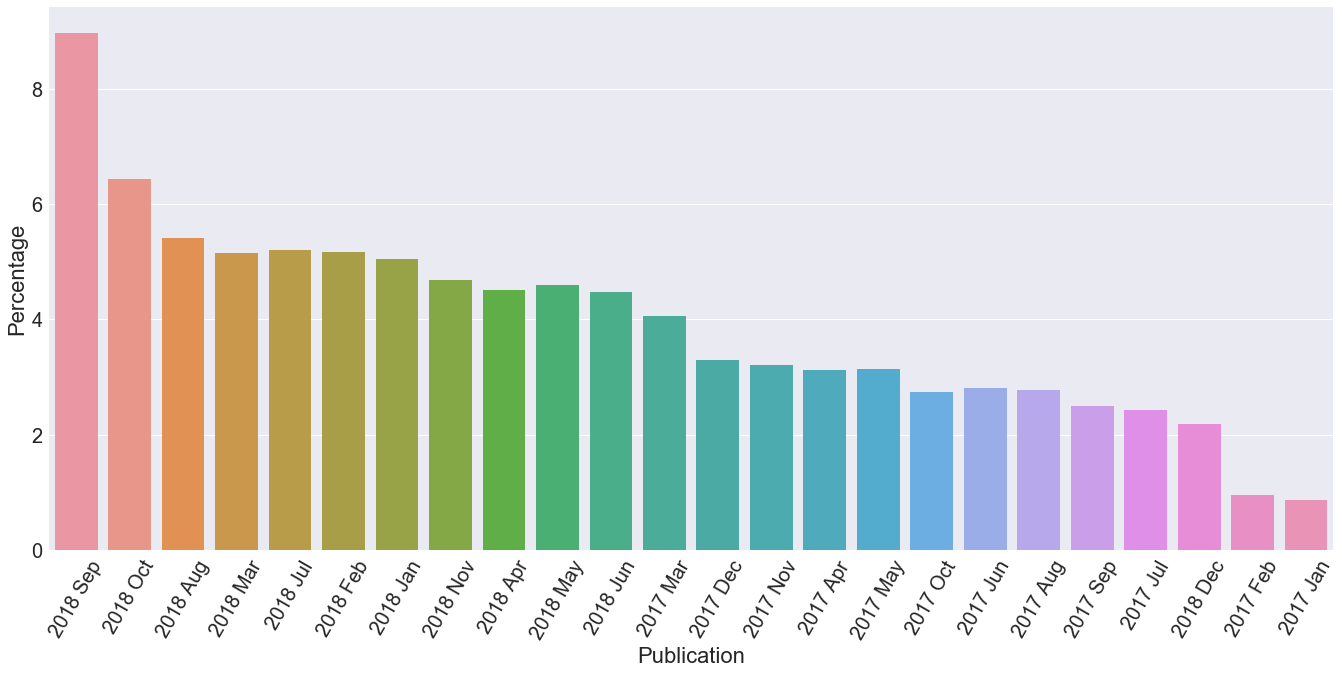

In [211]:
sns.set(font_scale=2)
carcass_plot = sns.barplot(car_data.Publication, y = car_data.Capacity, order=car_data.Publication.value_counts().index,
                          estimator=lambda x: len(x) / len(car_data) * 100)
carcass_plot.set_ylabel('Percentage')
plt.xticks(rotation=60)
plt.show()

After looking at this plots, now we have a grasp of our data, and we can see that all of the plots here make sense, there is no something unusual going on with the dataset. In the next notebook we will look at some univariate plots, and see if we can find something interesting there.